### Ordinary differential equations (ODEs) - Introduction

### 1. Differential cell growth model

A simple model of dynamic cell growth is
$$
\frac{d\rho}{dt} = \sigma \frac{\rho}{\rho_M}(\rho_M-\rho),\quad t\in [0,T]
$$

where $\rho$ is the cell density per surface unit, $\rho_M$ is the maximum cell density
(regulated by cell apoptosis) and $\sigma$ is related to the grwoth rate. 
The initial cell density is known:  $\rho(0) = \rho_0$, $0<\rho_0 \ll \rho_M$. 

The analytical expression of the exact solution is

$$
\rho(t) = \rho_M \, \frac{e^{\sigma t}}{\frac{\rho_M}{\rho_0}-1+e^{\sigma t}}.
$$


In the module ```scipy.integrate``` of ```scipy```, the function ```odeint()``` is a numerical integrator of differential equations:

```
from scipy.integrate import odeint
# ...

y = odeint(F, y0, t)
```

(see the help: ```? odeint```). 

As a first step, write a python function
```ydot = cellGrowth(y,t)``` that implements the function of the differential equation above.
Then solve the differential problem by using ```odeint()```. For the numerical 
application, the following parameters will be used: 
$T=20$, $\rho_M=1000$, $\rho_0=5$, $\sigma=0.7$ and ```td = np.linspace(0,T, 100)``` for
the array of discrete times.

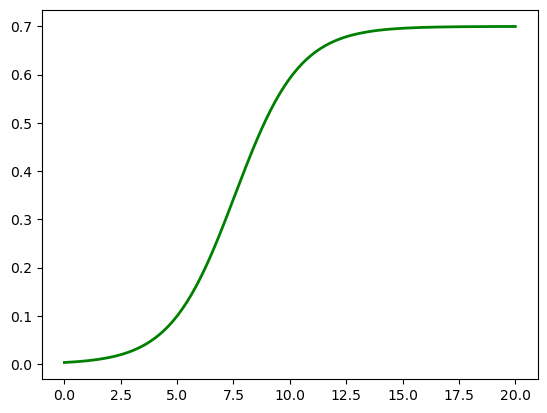

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def cellGrowth(rho,t):
    drhodt = (0.7 * rho/1000 * (1000 - rho))
    return drhodt
    
# Solving the differential problem using odeint()

rho0 = 5.0
T = 20.0
td = np.linspace(0,T, 200)
rhosol = odeint(cellGrowth, rho0, td)

def rhoexact(t):
    sol = 0.7 * (np.exp(0.7 * t)/(1000/rho0 - 1 + np.exp(0.7 * t)))
    return sol
    

# The exact solution
plt.plot(td, rhoexact(td), '-g', linewidth=2)

Plot the discrete solution $t\mapsto \rho(t)$ obtained with ```odeint()``` and compare it to the analytical solution.

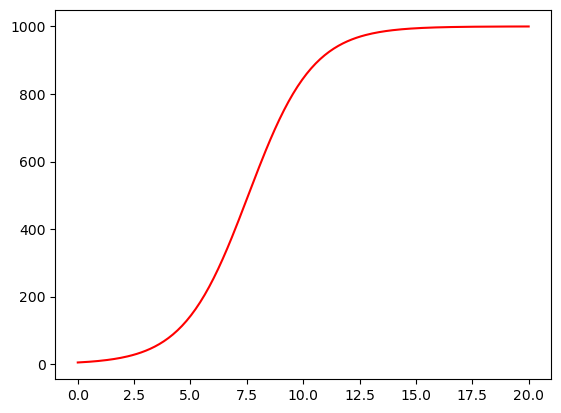

In [3]:
# The solution using odeint()
plt.plot(td, rhosol, 'r')

### 2. Nonlinear Duffing oscillator

The nonlinear Duffing system models an isolated mass-spring system with a nonlinear (cubic) elastic law. The kinematics and momentum equations write 

\begin{align*}
& \dot x(t) = v(t), \\
& \dot v(t) = - \alpha\, x(t) -\beta\, x^3(t).
\end{align*}


The term $\alpha x$ is the classical linear elasticity term where $\alpha>0$ is the spring stiffness coefficient. The cubic term $\beta x^3$ ($\beta>0$) acts on larger displacements.

One can check that the following total energy (sum of the kinetic energy and elastic energy)

$$
E=E(x,v) = \alpha \frac{x^2}{2} + \beta \frac{x^4}{4}
+ \frac{v^2}{2}
$$

is conserved during time evolution (Hamiltonian system).

First write the differential system under the abstract vector form

$$
\frac{d\mathbf{y}}{dt} = \mathbf{F}(\mathbf{y}(t),t)
$$

where the state vector $\mathbf{y}$ and the vector flow $\mathbf{F}(\mathbf{y},t)$ will be
given.

Write a python function 

```
ydot = Duffing(y,t)
``` 

that implements $\mathbf{F}$.
For the parameters, $\alpha=1$ and $\beta=12$ will be used.

In [4]:
def Duffing(y, t):
    a = 1
    b = 12
    x, v = y
    dxdt = v 
    dvdt = -a*x - b*x**3 #- 0.5*v
    ydot = np.array([dxdt,dvdt])
    return ydot

In [5]:
T = 20
y0 = np.array([2.0, 0.0])
td = np.linspace(0,T, 2000)
ysol = odeint(Duffing, y0, td)

Integrate the differential problem by using ```odeint()``` of ```scipy```. 
Use the following parameters and time table: $t_0=0$, $T=4$, 
$y_0=(x_0,v_0)^T=(2,0)^T$ and ```td = np.linspace(0,T, 200)```.

Plot the numerical discrete solutions $t\mapsto x(t)$ and $t\mapsto v(t)$. 
In another graphics, draw the time evolution of the total energy  $t\mapsto E(t)$ 
(check the energy scales being used).

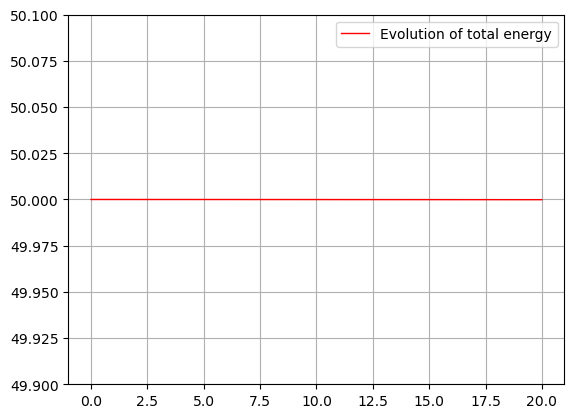

In [6]:
alpha = 1.0
beta = 12.0
x = ysol[:,0]
v = ysol[:,1]
E = alpha * (x**2/2) + beta*(x**4/4) + v**2/2

#Total Energy Plot
plt.plot(td, E, 'r', linewidth = 1, label = "Evolution of total energy")
plt.ylim([49.9, 50.1]); 
plt.legend()
plt.grid()

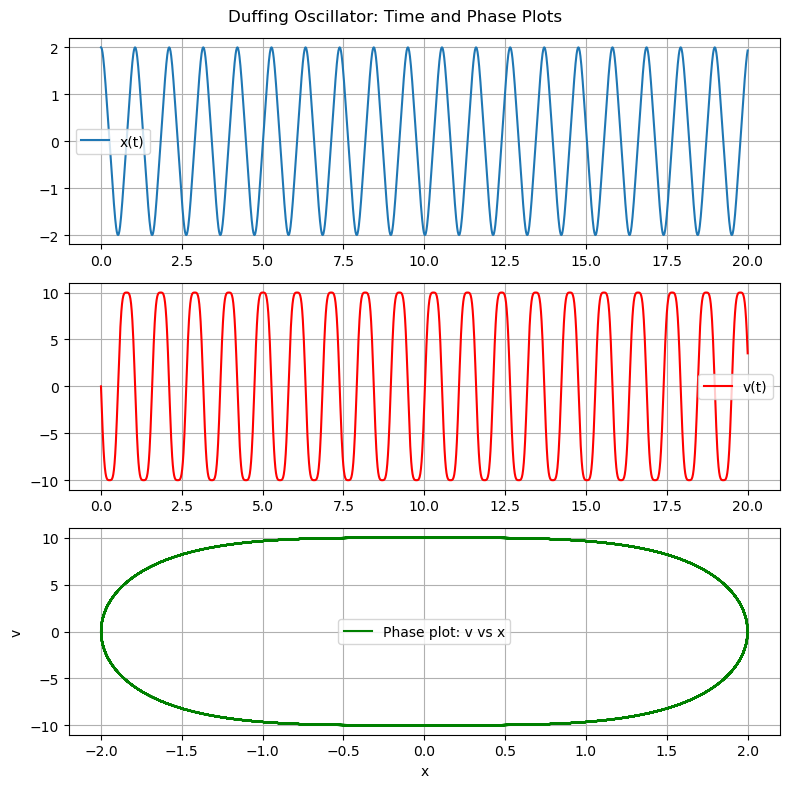

In [7]:
plt.figure(figsize=(8, 8))

plt.subplot(3, 1, 1)
plt.plot(td, x, label='x(t)')
plt.legend(); plt.grid()

plt.subplot(3, 1, 2)
plt.plot(td, v, label='v(t)', color='r')
plt.legend(); plt.grid()

plt.subplot(3, 1, 3)
plt.plot(x, v, label='Phase plot: v vs x', color='g')
plt.xlabel('x')
plt.ylabel('v')
plt.legend(); plt.grid()

plt.suptitle('Duffing Oscillator: Time and Phase Plots')
plt.tight_layout()
plt.show()

### 3. Explicit Euler scheme - First tests

Let us consider the linear differential equation

$$
\dot x = -\lambda x
$$
with $x(0) = 100$, $\lambda=0.5$. Solve the problem on the interval $[0,T]$,
$T=5$ using ```odeint()``` of ```scipy```. Use ```td = np.linspace(0,T, 200)``` as array of discrete times.

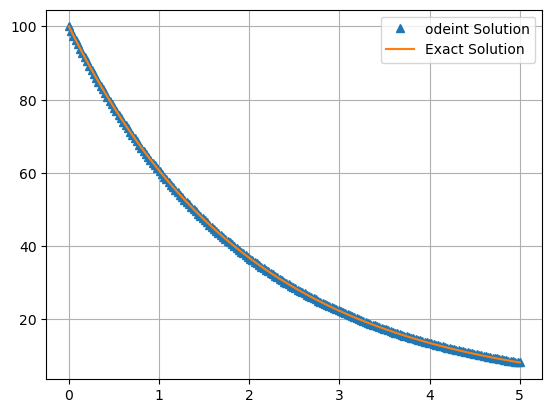

In [8]:
lmb = 0.5
x0 = 100

def Linear(x, t):
    dxdt = - (lmb * x)
    return dxdt

    
def xexact(t):
    #---To find the exact solution we have to solve the differential equation---#
    # dx/dt = -lmb*x 
    # dx/x = -lmb dt (we take integral on both sides)
    # ln|x| = - lmb * t
    # x = e^C * e^(lmb*t)
    sol = x0 * np.exp(-lmb*t)
    return sol
    
T = 5
td = np.linspace(0, T, 200)

odsol = odeint(Linear, x0, td)

plt.plot(td, odsol, '^', label= "odeint Solution")
plt.plot(td, xexact(td), label = "Exact Solution")
plt.legend()
plt.grid()

#### Explicit Euler scheme

The simplest explicit Euler scheme reads

$$
x_{n+1} = x_n + \Delta t\, f(x_n, t_n), \quad n\in \{0,...,N\}
$$

with $x_0=x(0)$, $\Delta t>0$ is a small time step and $t_n=n\Delta t$. We will use

$$
\Delta t = \frac{T}{N}.
$$

We have $x_n\approx x(t_n)$. Write a function

```
td, xd = Eulerexpl(func, x0, N, T)
# func: function
# x0: initial data
# N: nb of time intervals
# T: final time
```

that computes the values $x_n$, $n=0,...,N$ and stores them in the array ```xd```. The function returns the array of discrete times ```td``` and ```xd```. On a new graphics, plot
the points $(t_n, x_n)$ as a function and compare them to the exact solution (plotted in solid solid line).

In [9]:
import numpy as np

def Eulerexpl(func, x0, N, T):
    
    dt = T / N
    td = np.linspace(0, T, N + 1)
    x0 = np.array(x0, dtype=float)
    dim = x0.size

    xd = np.zeros((N + 1, dim))
    xd[0] = x0

    for n in range(N):
        xd[n + 1] = xd[n] + dt * func(xd[n], td[n])

    return td, xd

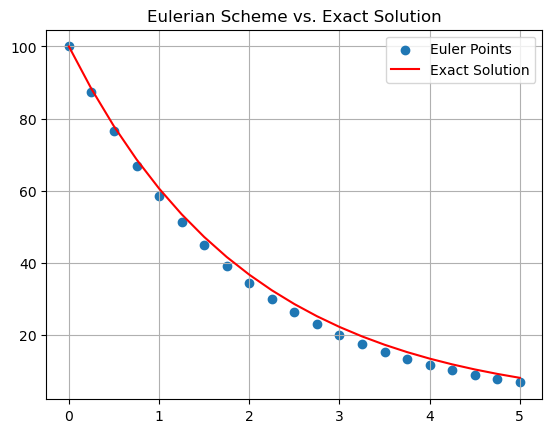

In [10]:
N = 20
x0 = np.array([100.0])
td, xd = Eulerexpl(Linear, x0, N, T)

plt.scatter(td, xd, label = "Euler Points")
plt.title("Eulerian Scheme vs. Exact Solution")
plt.plot(td, xexact(td), color = 'r', label = "Exact Solution")
plt.legend()
plt.grid()
plt.show()

#### Empirical estimation of the order of the scheme

Consider the error

$$
e_n = |x(t_n)-x_n|.
$$

For $N=10^i$ for $i$ varying from 1 to 4, compute $e_N$ (at final time $T=t_N$) and store the result into an array
$err(i)$. Plot the curve

$$
N \mapsto e_N
$$

in $\log_{10}$ scale. How to compute (estimate) the order of the scheme ? Assume that

$$
e_N = C\ (\Delta t)^p = C\ \left(\frac{T}{N}\right)^p = (C\, T^p)\, N^{-p}.
$$

for some integer $p$ and constant $C>0$. Try to find an empirical way to estimate $p$ from the array ```err```.

Indication : 

$$
\log(e_n) = \log(K) - p \, \log(N)
$$

for some constant $K$ independent of $N$.

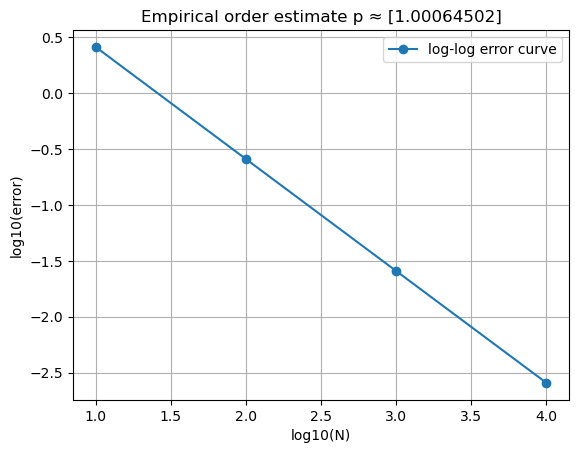

Estimated order p = [1.00064502]


In [16]:
N = np.zeros(4)
for i in range(1, 5):
    N[i - 1] = 10**i

err = []
for n in N:
    n = int(n)
    td, xd = Eulerexpl(Linear, x0, n, T)
    error = abs(xd[-1] - xexact(T))
    err.append(error)

logN = np.log10(N)
logE = np.log10(err)

#Parameter estimation is the slope of log-log curve
coef = np.polyfit(logN, logE, 1)
p_est = -coef[0]

# Plot
plt.plot(logN, logE, 'o-', label="log-log error curve")
plt.xlabel("log10(N)")
plt.ylabel("log10(error)")
plt.title(f"Empirical order estimate p ≈ {p_est}")
plt.grid(True)
plt.legend()
plt.show()

print("Estimated order p =", p_est)